In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from fig_style import *

import sys
sys.path.insert(0,'../')
from disk_model import DiskFitting

import matplotlib

In [2]:
def plot_cumulative_dist(x, **kwargs):
    N = len(x)
    x = np.concatenate(([0],np.sort(x)))
    y = np.arange(N+1)/(N)
    print('ratio of systems with chi^2<=1:',np.sum(x<=1)/len(x))
    plt.plot(x,y,**kwargs)

from get_chi_sq import get_mean_chisq_mult
def plot_chi_sq_dist(Ds,**kwargs):
    chi_sq = get_mean_chisq_mult(Ds)
    plot_cumulative_dist(chi_sq, **kwargs)

In [4]:
def set_x():
    plt.xscale('log')
    plt.xlim(0.2,8)
    plt.gca().set_xticks([0.2, 0.5, 1, 2, 5])
    plt.gca().get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

In [3]:
with open('../data/fitted_systems/fit_1mm_Q1d5_age1e5.pkl','rb') as f:
    Ds = pickle.load(f)
with open('../data/fitted_systems/fit_1mm_Q1_age1e5.pkl','rb') as f:
    Ds_Q1 = pickle.load(f)
with open('../data/fitted_systems/fit_1mm_Q2_age1e5.pkl','rb') as f:
    Ds_Q2 = pickle.load(f)
with open('../data/fitted_systems/fit_1mm_Q3_age1e5.pkl','rb') as f:
    Ds_Q3 = pickle.load(f)
with open('../data/fitted_systems/fit_1mm_Q10_age1e5.pkl','rb') as f:
    Ds_Q10 = pickle.load(f)
with open('../data/fitted_systems/fit_1mm_Q100_age1e5.pkl','rb') as f:
    Ds_Q100 = pickle.load(f)
with open('../data/fitted_systems/fit_1cm_Q1d5_age1e5.pkl','rb') as f:
    Ds_1cm = pickle.load(f)
with open('../data/fitted_systems/fit_100um_Q1d5_age1e5.pkl','rb') as f:
    Ds_100um = pickle.load(f)
with open('../data/fitted_systems/fit_10um_Q1d5_age1e5.pkl','rb') as f:
    Ds_10um = pickle.load(f)
with open('../data/fitted_systems/fit_1mm_Q1d5_age2e5.pkl','rb') as f:
    Ds_Mdot_half = pickle.load(f)
with open('../data/fitted_systems/fit_1mm_Q1d5_age5e4.pkl','rb') as f:
    Ds_Mdot_double = pickle.load(f)

# Scratch: compare with singles

In [5]:
singles = \
['2M05414483-0154357',
 'HH212mms',
 'HOPS-1',
 'HOPS-10',
 'HOPS-108',
 'HOPS-11',
 'HOPS-123',
 'HOPS-124',
 'HOPS-125',
 'HOPS-132',
 'HOPS-133',
 'HOPS-152',
 'HOPS-153',
 'HOPS-160',
 'HOPS-164',
 'HOPS-165',
 'HOPS-169',
 'HOPS-17',
 'HOPS-171',
 'HOPS-174',
 'HOPS-176',
 'HOPS-18',
 'HOPS-186',
 'HOPS-188',
 'HOPS-198',
 'HOPS-206',
 'HOPS-223',
 'HOPS-224',
 'HOPS-225',
 'HOPS-234',
 'HOPS-244',
 'HOPS-247',
 'HOPS-250',
 'HOPS-254',
 'HOPS-29',
 'HOPS-30',
 'HOPS-303',
 'HOPS-310',
 'HOPS-321',
 'HOPS-322',
 'HOPS-325',
 'HOPS-331',
 'HOPS-337',
 'HOPS-340',
 'HOPS-341',
 'HOPS-343',
 'HOPS-347',
 'HOPS-354',
 'HOPS-355',
 'HOPS-359',
 'HOPS-368',
 'HOPS-369',
 'HOPS-370',
 'HOPS-372',
 'HOPS-376',
 'HOPS-383',
 'HOPS-390',
 'HOPS-397',
 'HOPS-398',
 'HOPS-399',
 'HOPS-40',
 'HOPS-401',
 'HOPS-402',
 'HOPS-403',
 'HOPS-404',
 'HOPS-405',
 'HOPS-406',
 'HOPS-407',
 'HOPS-408',
 'HOPS-409',
 'HOPS-43',
 'HOPS-50',
 'HOPS-53',
 'HOPS-58',
 'HOPS-60',
 'HOPS-64',
 'HOPS-68',
 'HOPS-7',
 'HOPS-73',
 'HOPS-74',
 'HOPS-76',
 'HOPS-81',
 'HOPS-87',
 'HOPS-88',
 'HOPS-89',
 'HOPS-93',
 'HOPS-95',
 'HOPS-96',
 'HOPS-99',
 'OMC2-FIR4-ALMA1',
 'VLA15',
 'VLA16']

ratio of systems with chi^2<=1: 0.573170731707317
84 resolved systems
ratio of systems with chi^2<=1: 0.5764705882352941
ratio of systems with chi^2<=1: 0.6666666666666666


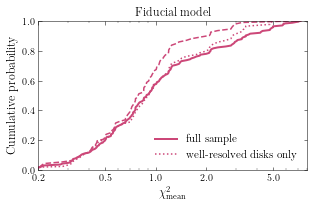

In [6]:
plt.figure(figsize=(4.5,3))
plt.xlim(0,6)
plt.ylim(0,1)
plt.xlabel(r'$\chi_{\rm mean}^2$')
plt.ylabel('Cumulative probability')

colors = matplotlib.cm.get_cmap('plasma')([.5,.5])

plot_chi_sq_dist(Ds, color=colors[0], lw=2)

# find resolved subsample
import astropy.table
data = astropy.table.Table.read("../data/VANDAM_T20_properties.txt", format="ascii")
data.add_index('Source') # add index by source
is_resolved = [data['RdiskA'][data.loc_indices[D.source_name]] > 50 for D in Ds] # disk diameter > 100
print(np.sum(is_resolved),'resolved systems')
plot_chi_sq_dist(np.array(Ds)[is_resolved], color=colors[1], ls=':')

is_single = [D.source_name in singles for D in Ds]
plot_chi_sq_dist(np.array(Ds)[is_single], color=colors[1], ls='--')

plt.legend(['full sample','well-resolved disks only'], frameon=False, loc=4)
plt.title('Fiducial model', size=12)
set_x()
set_ticks()

plt.tight_layout()

# Plot chi^2 distribution

ratio of systems with chi^2<=1: 0.573170731707317
84 resolved systems
ratio of systems with chi^2<=1: 0.5764705882352941


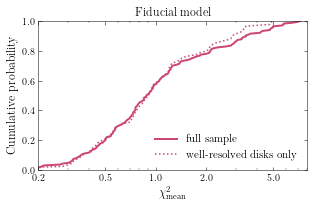

In [7]:
plt.figure(figsize=(4.5,3))
plt.xlim(0,3)
plt.ylim(0,1)
plt.xlabel(r'$\chi_{\rm mean}^2$')
plt.ylabel('Cumulative probability')

colors = matplotlib.cm.get_cmap('plasma')([.5,.5])

plot_chi_sq_dist(Ds, color=colors[0], lw=2)

# find resolved subsample
import astropy.table
data = astropy.table.Table.read("../data/VANDAM_T20_properties.txt", format="ascii")
data.add_index('Source') # add index by source
is_resolved = [data['RdiskA'][data.loc_indices[D.source_name]] > 50 for D in Ds] # disk diameter > 100
print(np.sum(is_resolved),'resolved systems')
plot_chi_sq_dist(np.array(Ds)[is_resolved], color=colors[1], ls=':')

plt.legend(['full sample','well-resolved disks only'], frameon=False, loc=4)
plt.title('Fiducial model', size=12)
set_x()
set_ticks()

plt.tight_layout()
plt.savefig('../figures/chi_sq_fid.pdf',bbox_inches='tight')

ratio of systems with chi^2<=1: 0.5670731707317073
ratio of systems with chi^2<=1: 0.573170731707317
ratio of systems with chi^2<=1: 0.5975609756097561
ratio of systems with chi^2<=1: 0.3475609756097561
ratio of systems with chi^2<=1: 0.4695121951219512
ratio of systems with chi^2<=1: 0.573170731707317
ratio of systems with chi^2<=1: 0.5609756097560976


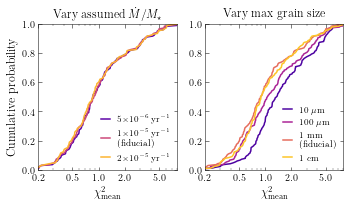

In [8]:
plt.figure(figsize=(5,3))

plt.subplot(121)
plt.xlim(0,3)
plt.ylim(0,1)
plt.xlabel(r'$\chi_{\rm mean}^2$')
plt.ylabel('Cumulative probability')

N = 3
colors = matplotlib.cm.get_cmap('plasma')((np.arange(N)+0.5)/N)

plot_chi_sq_dist(Ds_Mdot_half, color=colors[0])
plot_chi_sq_dist(Ds, color=colors[1])
plot_chi_sq_dist(Ds_Mdot_double, color=colors[2])

plt.legend([r'$5{\times}10^{-6}$ yr$^{-1}$',
            r'$1{\times}10^{-5}$ yr$^{-1}$'+'\n(fiducial)',
            r'$2{\times}10^{-5}$ yr$^{-1}$'], frameon=False, fontsize=9, handlelength=1, loc=4)
plt.title(r'Vary assumed $\dot M/M_\star$', size=12)
set_x()
set_ticks()

plt.subplot(122)
plt.xlim(0,3)
plt.ylim(0,1)
plt.xlabel(r'$\chi_{\rm mean}^2$')
#plt.ylabel('Cumulative probability')

N = 4
colors = matplotlib.cm.get_cmap('plasma')((np.arange(N)+0.5)/N)

plot_chi_sq_dist(Ds_10um, color=colors[0])
plot_chi_sq_dist(Ds_100um, color=colors[1])
plot_chi_sq_dist(Ds, color=colors[2])
plot_chi_sq_dist(Ds_1cm, color=colors[3])

plt.legend([r'10 $\mu$m',
            r'100 $\mu$m',
            r'1 mm'+'\n(fiducial)',
            r'1 cm'], frameon=False, fontsize=9, handlelength=1, loc=4)
plt.title(r'Vary max grain size', size=12)
set_x()
set_ticks()


plt.tight_layout()

plt.savefig('../figures/chi_sq_Mdot_and_amax.pdf',bbox_inches='tight')

ratio of systems with chi^2<=1: 0.5304878048780488
ratio of systems with chi^2<=1: 0.573170731707317
ratio of systems with chi^2<=1: 0.6097560975609756
ratio of systems with chi^2<=1: 0.5975609756097561
ratio of systems with chi^2<=1: 0.3048780487804878


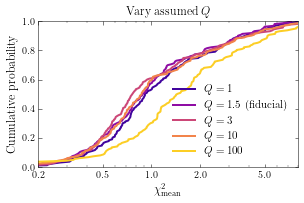

In [10]:
plt.figure(figsize=(4.5,3))
plt.xlim(0,3)
plt.ylim(0,1)
plt.xlabel(r'$\chi_{\rm mean}^2$')
plt.ylabel('Cumulative probability')

N = 5
colors = matplotlib.cm.get_cmap('plasma')((np.arange(N)+0.5)/N)

plot_chi_sq_dist(Ds_Q1, color=colors[0], lw=2)
plot_chi_sq_dist(Ds, color=colors[1], lw=2)
plot_chi_sq_dist(Ds_Q3, color=colors[2], lw=2)
plot_chi_sq_dist(Ds_Q10, color=colors[3], lw=2)
plot_chi_sq_dist(Ds_Q100, color=colors[4], lw=2)

plt.legend([r'$Q=1$',
            r'$Q=1.5$ (fiducial)',
            r'$Q=3$',
            r'$Q=10$',
            r'$Q=100$'], frameon=False, loc=4)
plt.title(r'Vary assumed $Q$',size=12)

plt.tight_layout()
set_x()
set_ticks()
plt.savefig('../figures/chi_sq_Q.pdf',bbox_inches='tight')